In [3]:
import tensorflow as tf

### Separable Problem

In [4]:
import numpy as np
n=2000
np.random.seed(1)
X=np.random.uniform(low=-2,high=2,size=(n,1))+np.random.normal(loc=0,scale=0.3,size=(n,1))
yy=np.random.uniform(low=-2,high=2,size=(n,1))
boundary=(X)**2-1
ind1=np.nonzero(yy>boundary)[0]
X1=X[ind1]
yy1=yy[ind1]+np.random.normal(loc=0,scale=0.2,size=(len(ind1),1))
ind0=np.nonzero(yy<=boundary-0.5)[0]
X0=X[ind0]
yy0=yy[ind0]+np.random.normal(loc=0,scale=0.3,size=(len(ind0),1))
XX=np.concatenate([X1,X0])
yy=np.concatenate([yy1,yy0])
X=np.concatenate([XX,yy],axis=1)
y=np.concatenate([np.tile([1],len(ind1)),np.tile([0],len(ind0))]).reshape((-1,1))
N=yy1.shape[0]+yy0.shape[0]

ind=np.arange(N)
np.random.shuffle(ind)

X=X[ind,]
y=y[ind,]

print("y=1 --> # of samples=",yy1.shape[0])
print("y=0 --> # of samples=",yy0.shape[0])
print("total # of samples=",N)
print("X.shape=",X.shape)
print("y.shape=",y.shape)

y=1 --> # of samples= 874
y=0 --> # of samples= 934
total # of samples= 1808
X.shape= (1808, 2)
y.shape= (1808, 1)


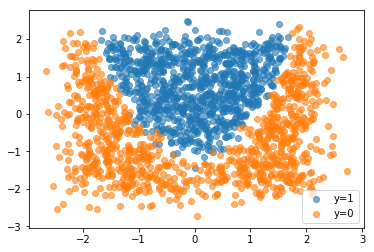

In [5]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(X1,yy1,label="y=1",alpha=0.6)
ax.scatter(X0,yy0,label="y=0",alpha=0.6)
plt.legend()
plt.show()

# non-linear data

构造非线性数据方法：

- 方式一

    class0：$N(\mu_1,\Sigma_p)，\mu_1=\mathbf{0}_{1000}$

    class1：$N(\mu_2,\Sigma_p)，\mu_2=(\mathbf{1}_{10}^{T},\mathbf{0}_{990}^{T})$

    $\Sigma_{ii}$ 的对角线全是 1，其它元素 $\Sigma_{ij}=\rho^{|i-j|}$
    
    
- 方式二

    class0：$N(\mu_1,\Sigma_p)，\mu_1=(3 \times \mathbf{1}_{10},\mathbf{0}_{p-10})^{T}$

    class1：$0.5 \times N(\mathbf{0}_p,\mathbf{I}_p)+0.5 \times N((6 \times \mathbf{1}_{10}^{T},\mathbf{0}_{p-10}^{T})^{T},\Sigma_p)$

    $\Sigma_{ii}$ 的对角线全是 1，其它元素 $\Sigma_{ij}=\rho^{|i-j|}$

## 两类样本

In [10]:
def genSigma(rho,shape):
    res=np.zeros(shape=shape)
    try:
        assert shape[0]==shape[1]
    except:
        print("Rows:%d and Cols:%d are not identical"%shape)
        return
    for i in range(shape[0]):
        for j in range(shape[1]):
            res[i,j]=rho**np.abs(i-j)
    return res

genSigma(rho=0.5,shape=(4,4))

array([[ 1.   ,  0.5  ,  0.25 ,  0.125],
       [ 0.5  ,  1.   ,  0.5  ,  0.25 ],
       [ 0.25 ,  0.5  ,  1.   ,  0.5  ],
       [ 0.125,  0.25 ,  0.5  ,  1.   ]])

In [11]:
import numpy as np
np.random.seed(1)
p=800
pos_n=2000
neg_n=2000
mu_1=np.concatenate([np.tile([3],10),np.zeros(shape=(p-10,))])
Sigma=genSigma(rho=0.5,shape=(p,p))
X_0=np.random.multivariate_normal(mean=mu_1,cov=Sigma,size=(pos_n,))
y_0=np.tile([0],pos_n)
X_1=0.5*np.random.multivariate_normal(mean=np.tile([0],p),cov=np.identity(p),
                                      size=(neg_n,))+0.5*np.random.multivariate_normal(
    mean=np.concatenate([np.tile([6],10),np.tile([0],p-10)]),
                                 cov=Sigma)
y_1=np.tile([1],neg_n)

print("X_0.shape=",X_0.shape)
print("y_0.shape=",y_0.shape)
print("X_1.shape=",X_1.shape)
print("y_1.shape=",y_1.shape)

X_0.shape= (2000, 800)
y_0.shape= (2000,)
X_1.shape= (2000, 800)
y_1.shape= (2000,)


In [15]:
X=np.concatenate([X_0,X_1],axis=0)
y_cat=np.concatenate([y_0,y_1],axis=0)
ind=np.arange(X.shape[0])
np.random.shuffle(ind)
with tf.Session() as sess:
    y=sess.run(tf.one_hot(y_cat,2))
X=X[ind,]
y=y[ind,]
print("X.shape=",X.shape)
print("y.shape=",y.shape)
ind0=np.nonzero(y_cat==0)[0]
ind1=np.nonzero(y_cat==1)[0]
print("ind0.shape=",len(ind0))
print("ind1.shape=",len(ind1))

X.shape= (4000, 800)
y.shape= (4000, 2)
ind0.shape= 2000
ind1.shape= 2000


### 可视化样本数据

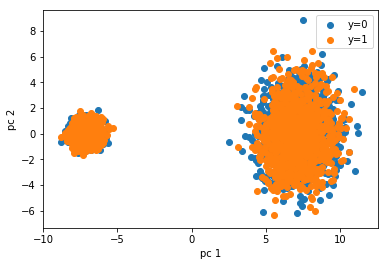

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

plt.scatter(X_pca[ind0,0],X_pca[ind0,1],label="y=0")
plt.scatter(X_pca[ind1,0],X_pca[ind1,1],label="y=1")
plt.legend()
plt.xlabel("pc 1")
plt.ylabel("pc 2")
plt.show()

## 三类样本

In [49]:
import numpy as np
np.random.seed(1)

def h1(j):
    return np.array(list(map(lambda x:np.max([6-np.abs(x-11),0]),j)))

h2=lambda x:h1(x-4)
h3=lambda x:h1(x+4)

p=21
j=np.arange(1,p+1)
n=1000

U=np.random.uniform(low=0,high=1,size=(n,1))
noise=np.random.normal(loc=0,scale=1,size=(n,p))
X1=U*h1(j)+(1-U)*h2(j)+noise
y1=np.tile([0],reps=(n,))
X2=U*h1(j)+(1-U)*h3(j)+noise
y2=np.tile([1],reps=(n,))
X3=U*h2(j)+(1-U)*h3(j)+noise
y3=np.tile([2],reps=(n,))
print("X1.shape=",X1.shape)
print("y1.shape=",y1.shape)
print("X2.shape=",X2.shape)
print("y2.shape=",y2.shape)
print("X3.shape=",X3.shape)
print("y3.shape=",y3.shape)

X1.shape= (1000, 21)
y1.shape= (1000,)
X2.shape= (1000, 21)
y2.shape= (1000,)
X3.shape= (1000, 21)
y3.shape= (1000,)


In [50]:
np.random.seed(1)
X=np.concatenate([X1,X2,X3],axis=0)
y_cat=np.concatenate([y1,y2,y3],axis=0)
with tf.Session() as sess:
    y=sess.run(tf.one_hot(y_cat,3))

ind=np.arange(X.shape[0])
np.random.shuffle(ind)
X=X[ind,]
y=y[ind,]
print("X.shape=",X.shape)
print("y.shape=",y.shape)

ind1=np.nonzero(y_cat==0)[0]
ind2=np.nonzero(y_cat==1)[0]
ind3=np.nonzero(y_cat==2)[0]

print("ind1.shape=",len(ind1))
print("ind2.shape=",len(ind2))
print("ind3.shape=",len(ind3))

X.shape= (3000, 21)
y.shape= (3000, 3)
ind1.shape= 1000
ind2.shape= 1000
ind3.shape= 1000


### 可视化样本

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


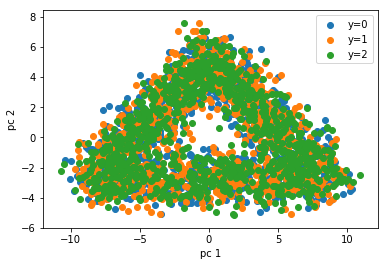

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
np.random.seed(1)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

plt.scatter(X_pca[ind1,0],X_pca[ind1,1],label="y=0")
plt.scatter(X_pca[ind2,0],X_pca[ind2,1],label="y=1")
plt.scatter(X_pca[ind3,0],X_pca[ind3,1],label="y=2")
plt.legend()
plt.xlabel("pc 1")
plt.ylabel("pc 2")
plt.show()

# SGL和CMCP

In [47]:
def L21_norm(W):
    if len(W.shape)==1:
        res=tf.norm(W)
    else:
        res=tf.reduce_sum(tf.norm(W,axis=-1))
    return res

def L1_reg(v):
    L1_loss=tf.reduce_sum([tf.reduce_sum(tf.abs(W)) for W in v])
    return L1_loss

def group_regularization(v):
    coeff=lambda W:tf.sqrt(tf.cast(W.get_shape().as_list()[-1],tf.float32))
    L1_loss=L1_reg(v)
    res=tf.reduce_sum([tf.multiply(coeff(W),L21_norm(W)) for W in v])+L1_loss
    return res

def f_lamb_a(w,a,lamb):
    condition=w<a*lamb
    if len(condition.shape)==0:
        res=tf.where(condition,
                 tf.cast(lamb*tf.abs(w)-tf.square(w)/(2*a),tf.float32),
                 tf.cast(a*tf.square(lamb)/2,tf.float32))
    else:
        fill_units=condition.get_shape()
        res=tf.where(condition,
                 tf.cast(lamb*tf.abs(w)-tf.square(w)/(2*a),tf.float32),
                 tf.tile([tf.cast(a*tf.square(lamb)/2,tf.float32)],fill_units))
    return res

def inside_MCP(W,lamb,a):
    K=W.get_shape().as_list()[-1]
    f=lambda w:f_lamb_a(w,a=a,lamb=lamb)
    if len(W.shape)==1:
        u_jk=f(W)
        u_j=tf.reduce_sum(u_jk)
    else:
        u_jk=tf.map_fn(f,W)
        u_j=tf.reduce_sum(u_jk,axis=-1)
    return u_j,K

def convinience(W,lamb,a):
    IMCP=inside_MCP(W,lamb,a)
    res=tf.reduce_sum(f_lamb_a(IMCP[0],IMCP[1]*a*lamb/2,lamb))
    return res

def CMCP(v,lamb,a):
    inside_part=[convinience(W,lamb,a) for W in v]
    res=tf.reduce_sum(inside_part)
    return res

def create_layer(in_var,in_size,out_size):
    W=tf.Variable(tf.truncated_normal([in_size,out_size],stddev=0.1),name="Weight")
    b=tf.Variable(tf.truncated_normal([out_size],stddev=0.1),name="bias")
    res=tf.nn.relu(tf.matmul(tf.cast(in_var,tf.float32),W)+b)
    return res

def nonlinear_str(train_x,train_y,test_x,test_y,epochs,batch_size,s,reg_method="SGL"):
    with tf.Graph().as_default():
        train_N,feats=train_x.shape
        n_class=train_y.shape[1]
        X=tf.placeholder(tf.float32,[None,feats],name="input")
        d=tf.placeholder(tf.float32,[None,n_class],name="target")
        
        with tf.name_scope("hidden1"):
            h1=create_layer(X,feats,300)
        with tf.name_scope("hidden2"):
            h2=create_layer(h1,300,100)
        with tf.name_scope("hidden3"):
            h3=create_layer(h2,100,50)
        with tf.name_scope("output"):
            y=create_layer(h3,50,n_class)
        
        count_neurons=lambda W:tf.reduce_sum(tf.cast(tf.greater(tf.reduce_mean(tf.abs(W),axis=-1),10**(-3)),tf.float32))
        
        v=tf.trainable_variables()
                        
        res_neurons=[count_neurons(W) for W in v]
        res_total_neurons=tf.reduce_sum(res_neurons)
        
        
        with tf.name_scope("loss"):
            if n_class>2:
                loss=tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=d)
            elif n_class==2:
                loss=tf.nn.sigmoid_cross_entropy_with_logits(logits=y,labels=d)
            
        if reg_method=="SGL":
            with tf.name_scope("SGL"):
                lamb=0.0007
                reg_loss=lamb*group_regularization(v)
        elif reg_method=="CMCP":
            with tf.name_scope("Composite_MCP"):
                lamb=6*10**-2
                a=21.8
                reg_loss=CMCP(v,lamb,a)
            
        correct_prediction=tf.equal(tf.argmax(d,1),tf.argmax(y,1))
        accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        
        with tf.Session() as sess:
            with tf.name_scope("train"):
                train_step=tf.train.AdamOptimizer().minimize(tf.add(loss,reg_loss))
            sess.run(tf.global_variables_initializer())
            train_acc_lis=[]
            test_acc_lis=[]
            res_n_lis=[]
            for i in range(epochs):            
                batch=np.random.choice(np.arange(train_N),size=batch_size)
                batch_x=train_x[batch,]
                batch_y=train_y[batch,]
                _,res_n=sess.run([train_step,res_total_neurons],feed_dict={X:batch_x,d:batch_y})
                res_n_lis.append(res_n)
                
                record_train_acc=sess.run(accuracy,feed_dict={X:train_x,d:train_y})
                train_acc_lis.append(record_train_acc)
                
                record_test_acc=sess.run(accuracy,feed_dict={X:test_x,d:test_y})
                test_acc_lis.append(record_test_acc)
                
                if i==epochs-1:
                    print("Final accuracy on train set: ",record_train_acc)
                    print("Final accuracy on test set: ",record_test_acc)
                    
            if reg_method=="SGL":
                s['train_accuracy']['SGL']=train_acc_lis
                s['test_accuracy']['SGL']=test_acc_lis
                s["neurons"]['SGL']=res_n_lis
            elif reg_method=="CMCP":
                s['train_accuracy']['CMCP']=train_acc_lis
                s['test_accuracy']['CMCP']=test_acc_lis
                s["neurons"]['CMCP']=res_n_lis
            neurons_per_layer=sess.run([res_neurons[i] for i in range(0,7,2)])
            print("Final neurons in each layer: ",neurons_per_layer)
    return s,[record_train_acc,record_test_acc],neurons_per_layer

## 两类样本的神经网络

In [9]:
s={"train_accuracy":{"SGL":[],"CMCP":[]},"test_accuracy":{"SGL":[],"CMCP":[]},"neurons":{"SGL":[],"CMCP":[]}}

In [14]:
s_ind=3400
train_x=X[:s_ind,]
test_x=X[s_ind:,]
train_y=y[:s_ind,]
test_y=y[s_ind:,]
print("train_x.shape=",train_x.shape)
print("train_y.shape=",train_y.shape)
print("test_x.shape=",test_x.shape)
print("test_y.shape=",test_y.shape)

train_x.shape= (3400, 800)
train_y.shape= (3400, 3)
test_x.shape= (600, 800)
test_y.shape= (600, 3)


In [20]:
res=nonlinear_str(train_x,train_y,test_x,test_y,epochs=1000,batch_size=400,s=s,reg_method="SGL")

Final accuracy on train set:  1.0
Final accuracy on test set:  0.998333
Final neurons in each layer:  [2.0, 2.0, 6.0, 29.0]


In [21]:
res["train_accuracy"]["CMCP"]=[]
res["test_accuracy"]["CMCP"]=[]
res["neurons"]["CMCP"]=[]
res2=nonlinear_str(train_x,train_y,test_x,test_y,epochs=1000,batch_size=400,s=res,reg_method="CMCP")

Final accuracy on train set:  1.0
Final accuracy on test set:  1.0
Final neurons in each layer:  [3.0, 3.0, 4.0, 19.0]


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


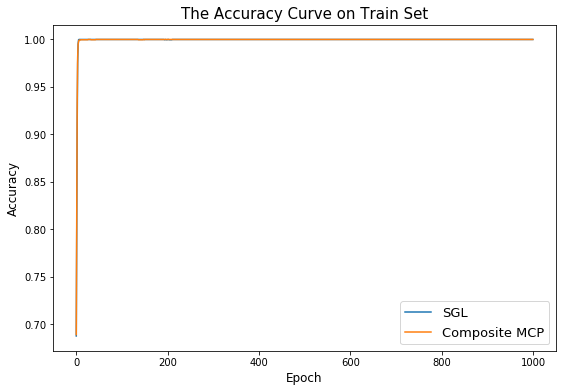

In [22]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(res2['train_accuracy']['SGL'],label="SGL")
ax.plot(res2["train_accuracy"]["CMCP"],label="Composite MCP")
title=ax.set_title("The Accuracy Curve on Train Set")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epoch")
ylab=plt.ylabel("Accuracy")

xlab.set_fontsize(fontsize=12)
ylab.set_fontsize(fontsize=12)
plt.legend(prop={"size":13})
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


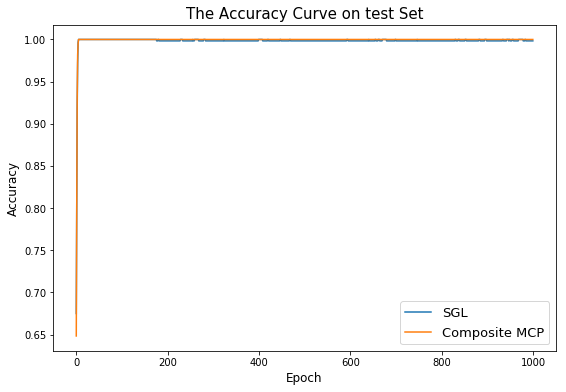

In [23]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(res['test_accuracy']['SGL'],label="SGL")
ax.plot(res["test_accuracy"]["CMCP"],label="Composite MCP")
title=ax.set_title("The Accuracy Curve on test Set")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epoch")
ylab=plt.ylabel("Accuracy")

xlab.set_fontsize(fontsize=12)
ylab.set_fontsize(fontsize=12)
plt.legend(prop={"size":13})
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


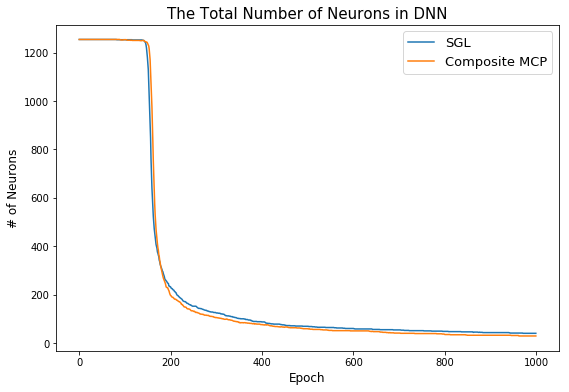

In [24]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(res['neurons']['SGL'],label="SGL")
ax.plot(res["neurons"]["CMCP"],label="Composite MCP")
title=ax.set_title("The Total Number of Neurons in DNN")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epoch")
ylab=plt.ylabel("# of Neurons")

xlab.set_fontsize(fontsize=12)
ylab.set_fontsize(fontsize=12)
plt.legend(prop={"size":13})
plt.show()

## 三类样本的神经网络

In [20]:
s_ind=2400
train_x=X[:s_ind,]
test_x=X[s_ind:,]
train_y=y[:s_ind,]
test_y=y[s_ind:,]
print("train_x.shape=",train_x.shape)
print("train_y.shape=",train_y.shape)
print("test_x.shape=",test_x.shape)
print("test_y.shape=",test_y.shape)

train_x.shape= (2400, 21)
train_y.shape= (2400, 3)
test_x.shape= (600, 21)
test_y.shape= (600, 3)


### 交叉验证

In [53]:
def lis_add(new,old):
    res=[]
    for i in range(len(new)):
        res.append(new[i]+old[i])
    return res

N=3000
epochs=1000
k=5
fold=int(N/k)
new_SGL_n=[]
new_CMCP_n=[]
new_SGL=[0]*2
new_CMCP=[0]*2
new_dict={"train_accuracy":{"SGL":[0]*epochs,"CMCP":[0]*epochs},"test_accuracy":{"SGL":[0]*epochs,"CMCP":[0]*epochs},
          "neurons":{"SGL":[0]*epochs,"CMCP":[0]*epochs}}

for i in range(k):
    s={"train_accuracy":{"SGL":[],"CMCP":[]},"test_accuracy":{"SGL":[],"CMCP":[]},
       "neurons":{"SGL":[],"CMCP":[]}}
    test_x=X[(i*fold):((i+1)*fold),]
    test_y=y[(i*fold):((i+1)*fold),]
    ind=list(map(int,np.concatenate([range(i*fold),range((i+1)*fold,N)])))
    train_x=X[ind,]
    train_y=y[ind,]
    print("-------------%d-th fold start------------"%(i+1))
    print("train_x.shape=",train_x.shape)
    print("train_y.shape=",train_y.shape)
    print("test_x.shape=",test_x.shape)
    print("test_y.shape=",test_y.shape)
    r,lis_SGL,lis_n_SGL=nonlinear_str(train_x,train_y,test_x,test_y,epochs=epochs,batch_size=400,s=s,reg_method="SGL")
    new_SGL=lis_add(new_SGL,lis_SGL)
    new_SGL_n.extend(lis_n_SGL)
    r,lis_CMCP,lis_n_CMCP=nonlinear_str(train_x,train_y,test_x,test_y,epochs=epochs,batch_size=400,s=r,reg_method="CMCP")
    new_CMCP=lis_add(new_CMCP,lis_CMCP)
    new_CMCP_n.extend(lis_n_CMCP)
    new_dict["train_accuracy"]["SGL"]=lis_add(new_dict["train_accuracy"]["SGL"],r["train_accuracy"]["SGL"])
    new_dict["train_accuracy"]["CMCP"]=lis_add(new_dict["train_accuracy"]["CMCP"],r["train_accuracy"]["CMCP"])
    new_dict["test_accuracy"]["SGL"]=lis_add(new_dict["test_accuracy"]["SGL"],r["test_accuracy"]["SGL"])
    new_dict["test_accuracy"]["CMCP"]=lis_add(new_dict["test_accuracy"]["CMCP"],r["test_accuracy"]["CMCP"])   
    new_dict["neurons"]["SGL"]=lis_add(new_dict["neurons"]["SGL"],r["neurons"]["SGL"])
    new_dict["neurons"]["CMCP"]=lis_add(new_dict["neurons"]["CMCP"],r["neurons"]["CMCP"])

-------------1-th fold start------------
train_x.shape= (2400, 21)
train_y.shape= (2400, 3)
test_x.shape= (600, 21)
test_y.shape= (600, 3)
Final accuracy on train set:  0.8725
Final accuracy on test set:  0.873333
Final neurons in each layer:  [17.0, 23.0, 23.0, 38.0]
Final accuracy on train set:  0.8725
Final accuracy on test set:  0.873333
Final neurons in each layer:  [17.0, 19.0, 12.0, 32.0]
-------------2-th fold start------------
train_x.shape= (2400, 21)
train_y.shape= (2400, 3)
test_x.shape= (600, 21)
test_y.shape= (600, 3)
Final accuracy on train set:  0.868333
Final accuracy on test set:  0.858333
Final neurons in each layer:  [17.0, 15.0, 11.0, 24.0]
Final accuracy on train set:  0.87375
Final accuracy on test set:  0.861667
Final neurons in each layer:  [17.0, 28.0, 11.0, 33.0]
-------------3-th fold start------------
train_x.shape= (2400, 21)
train_y.shape= (2400, 3)
test_x.shape= (600, 21)
test_y.shape= (600, 3)
Final accuracy on train set:  0.860417
Final accuracy on tes

In [54]:
print("--SGL--\naverage train_accuracy:%f\naverage test_accuracy:%f"%tuple(list(map(lambda x: x/k,new_SGL[:2]))))
print("--Composite MCP--\naverage train_accuracy:%f\naverage test_accuracy:%f"%tuple(list(map(lambda x: x/k,new_CMCP[:2]))))

--SGL--
average train_accuracy:0.870917
average test_accuracy:0.861667
--Composite MCP--
average train_accuracy:0.872083
average test_accuracy:0.864333


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


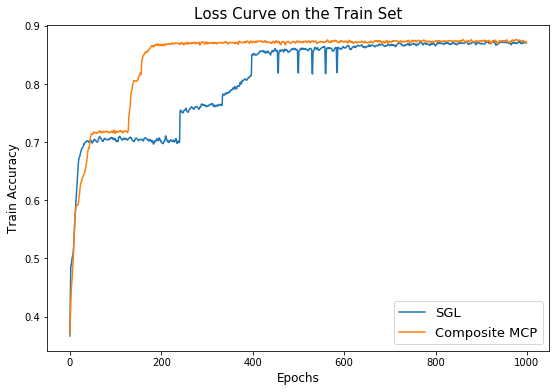

In [55]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(list(map(lambda x:x/k,new_dict["train_accuracy"]["SGL"])),label="SGL")
ax.plot(list(map(lambda x:x/k,new_dict["train_accuracy"]["CMCP"])),label="Composite MCP")
title=ax.set_title("Loss Curve on the Train Set")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epochs")
ylab=plt.ylabel("Train Accuracy")

xlab.set_fontsize(fontsize=12)
ylab.set_fontsize(fontsize=12)
plt.legend(prop={"size":13})
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


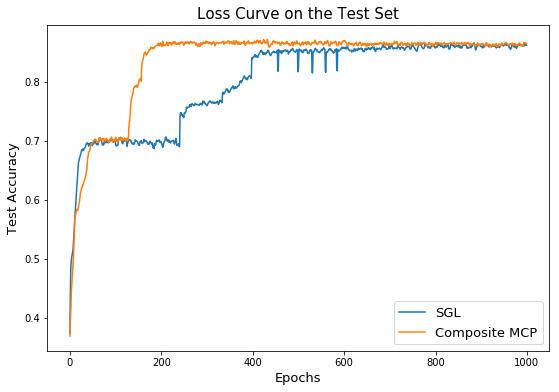

In [56]:
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(list(map(lambda x:x/k,new_dict["test_accuracy"]["SGL"])),label="SGL")
ax.plot(list(map(lambda x:x/k,new_dict["test_accuracy"]["CMCP"])),label="Composite MCP")
title=ax.set_title("Loss Curve on the Test Set")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epochs")
ylab=plt.ylabel("Test Accuracy")

xlab.set_fontsize(fontsize=13)
ylab.set_fontsize(fontsize=13)
plt.legend(prop={"size":13})
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


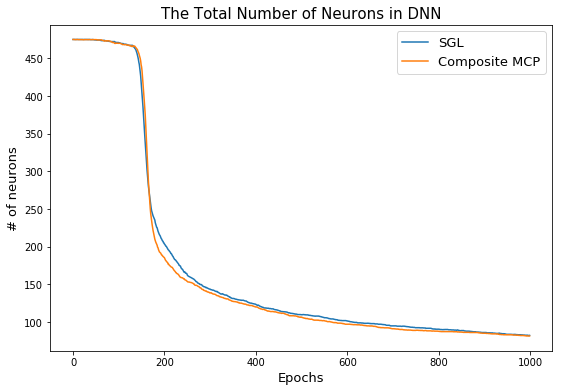

In [57]:
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(list(map(lambda x:x/k,new_dict["neurons"]["SGL"])),label="SGL")
ax.plot(list(map(lambda x:x/k,new_dict["neurons"]["CMCP"])),label="Composite MCP")

title=ax.set_title("The Total Number of Neurons in DNN")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epochs")
ylab=plt.ylabel("# of neurons")

xlab.set_fontsize(fontsize=13)
ylab.set_fontsize(fontsize=13)
plt.legend(prop={"size":13})

plt.show()

### 单次迭代结果

In [ ]:
def L21_norm(W):
    if len(W.shape)==1:
        res=tf.norm(W)
    else:
        res=tf.reduce_sum(tf.norm(W,axis=-1))
    return res

def L1_reg(v):
    L1_loss=tf.reduce_sum([tf.reduce_sum(tf.abs(W)) for W in v])
    return L1_loss

def group_regularization(v):
    coeff=lambda W:tf.sqrt(tf.cast(W.get_shape().as_list()[-1],tf.float32))
    L1_loss=L1_reg(v)
    res=tf.reduce_sum([tf.multiply(coeff(W),L21_norm(W)) for W in v])+L1_loss
    return res

def f_lamb_a(w,a,lamb):
    condition=w<a*lamb
    if len(condition.shape)==0:
        res=tf.where(condition,
                 tf.cast(lamb*tf.abs(w)-tf.square(w)/(2*a),tf.float32),
                 tf.cast(a*tf.square(lamb)/2,tf.float32))
    else:
        fill_units=condition.get_shape()
        res=tf.where(condition,
                 tf.cast(lamb*tf.abs(w)-tf.square(w)/(2*a),tf.float32),
                 tf.tile([tf.cast(a*tf.square(lamb)/2,tf.float32)],fill_units))
    return res

def inside_MCP(W,lamb,a):
    K=W.get_shape().as_list()[-1]
    f=lambda w:f_lamb_a(w,a=a,lamb=lamb)
    if len(W.shape)==1:
        u_jk=f(W)
        u_j=tf.reduce_sum(u_jk)
    else:
        u_jk=tf.map_fn(f,W)
        u_j=tf.reduce_sum(u_jk,axis=-1)
    return u_j,K

def convinience(W,lamb,a):
    IMCP=inside_MCP(W,lamb,a)
    res=tf.reduce_sum(f_lamb_a(IMCP[0],IMCP[1]*a*lamb/2,lamb))
    return res

def CMCP(v,lamb,a):
    inside_part=[convinience(W,lamb,a) for W in v]
    res=tf.reduce_sum(inside_part)
    return res

def create_layer(in_var,in_size,out_size):
    W=tf.Variable(tf.truncated_normal([in_size,out_size],stddev=0.1),name="Weight")
    b=tf.Variable(tf.truncated_normal([out_size],stddev=0.1),name="bias")
    res=tf.nn.relu(tf.matmul(tf.cast(in_var,tf.float32),W)+b)
    return res

def nonlinear_str(train_x,train_y,test_x,test_y,epochs,batch_size,s,reg_method="SGL"):
    with tf.Graph().as_default():
        train_N,feats=train_x.shape
        n_class=train_y.shape[1]
        X=tf.placeholder(tf.float32,[None,feats],name="input")
        d=tf.placeholder(tf.float32,[None,n_class],name="target")
        
        with tf.name_scope("hidden1"):
            h1=create_layer(X,feats,300)
        with tf.name_scope("hidden2"):
            h2=create_layer(h1,300,100)
        with tf.name_scope("hidden3"):
            h3=create_layer(h2,100,50)
        with tf.name_scope("output"):
            y=create_layer(h3,50,n_class)
        
        count_neurons=lambda W:tf.reduce_sum(tf.cast(tf.greater(tf.reduce_mean(tf.abs(W),axis=-1),10**(-3)),tf.float32))
        
        v=tf.trainable_variables()
                        
        res_neurons=[count_neurons(W) for W in v]
        res_total_neurons=tf.reduce_sum(res_neurons)
        
        
        with tf.name_scope("loss"):
            if n_class>2:
                loss=tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=d)
            elif n_class==2:
                loss=tf.nn.sigmoid_cross_entropy_with_logits(logits=y,labels=d)
            
        if reg_method=="SGL":
            with tf.name_scope("SGL"):
                lamb=0.0007
                reg_loss=lamb*group_regularization(v)
        elif reg_method=="CMCP":
            with tf.name_scope("Composite_MCP"):
                lamb=6*10**-2
                a=21.8
                reg_loss=CMCP(v,lamb,a)
            
        correct_prediction=tf.equal(tf.argmax(d,1),tf.argmax(y,1))
        accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        
        with tf.Session() as sess:
            with tf.name_scope("train"):
                train_step=tf.train.AdamOptimizer().minimize(tf.add(loss,reg_loss))
            sess.run(tf.global_variables_initializer())
            train_acc_lis=[]
            test_acc_lis=[]
            res_n_lis=[]
            for i in range(epochs):            
                batch=np.random.choice(np.arange(train_N),size=batch_size)
                batch_x=train_x[batch,]
                batch_y=train_y[batch,]
                _,res_n=sess.run([train_step,res_total_neurons],feed_dict={X:batch_x,d:batch_y})
                res_n_lis.append(res_n)
                
                record_train_acc=sess.run(accuracy,feed_dict={X:train_x,d:train_y})
                train_acc_lis.append(record_train_acc)
                
                record_test_acc=sess.run(accuracy,feed_dict={X:test_x,d:test_y})
                test_acc_lis.append(record_test_acc)
                
                if i==epochs-1:
                    print("Final accuracy on train set: ",record_train_acc)
                    print("Final accuracy on test set: ",record_test_acc)
                    
            if reg_method=="SGL":
                s['train_accuracy']['SGL']=train_acc_lis
                s['test_accuracy']['SGL']=test_acc_lis
                s["neurons"]['SGL']=res_n_lis
            elif reg_method=="CMCP":
                s['train_accuracy']['CMCP']=train_acc_lis
                s['test_accuracy']['CMCP']=test_acc_lis
                s["neurons"]['CMCP']=res_n_lis
            neurons_per_layer=sess.run([res_neurons[i] for i in range(0,7,2)])
            print("Final neurons in each layer: ",neurons_per_layer)
    return s

In [ ]:
s={"train_accuracy":{"SGL":[],"CMCP":[]},"test_accuracy":{"SGL":[],"CMCP":[]},"neurons":{"SGL":[],"CMCP":[]}}

In [58]:
res=nonlinear_str(train_x,train_y,test_x,test_y,epochs=1000,batch_size=400,s=s,reg_method="SGL")

Final accuracy on train set:  0.875
Final accuracy on test set:  0.875
Final neurons in each layer:  [17.0, 20.0, 21.0, 34.0]


In [63]:
res["train_accuracy"]["CMCP"]=[]
res["test_accuracy"]["CMCP"]=[]
res["neurons"]["CMCP"]=[]
res2=nonlinear_str(train_x,train_y,test_x,test_y,epochs=1000,batch_size=400,s=res,reg_method="CMCP")

Final accuracy on train set:  0.8725
Final accuracy on test set:  0.875
Final neurons in each layer:  [17.0, 25.0, 14.0, 24.0]


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


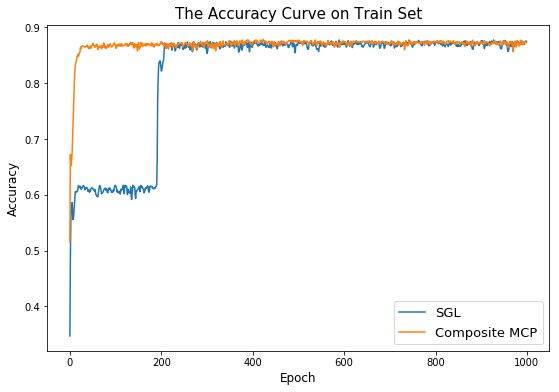

In [64]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(res2['train_accuracy']['SGL'],label="SGL")
ax.plot(res2["train_accuracy"]["CMCP"],label="Composite MCP")
title=ax.set_title("The Accuracy Curve on Train Set")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epoch")
ylab=plt.ylabel("Accuracy")

xlab.set_fontsize(fontsize=12)
ylab.set_fontsize(fontsize=12)
plt.legend(prop={"size":13})
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


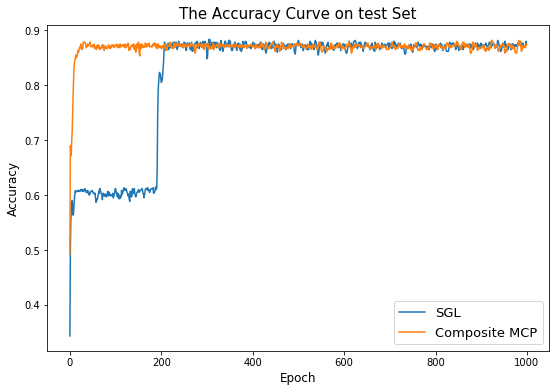

In [65]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(res['test_accuracy']['SGL'],label="SGL")
ax.plot(res["test_accuracy"]["CMCP"],label="Composite MCP")
title=ax.set_title("The Accuracy Curve on test Set")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epoch")
ylab=plt.ylabel("Accuracy")

xlab.set_fontsize(fontsize=12)
ylab.set_fontsize(fontsize=12)
plt.legend(prop={"size":13})
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


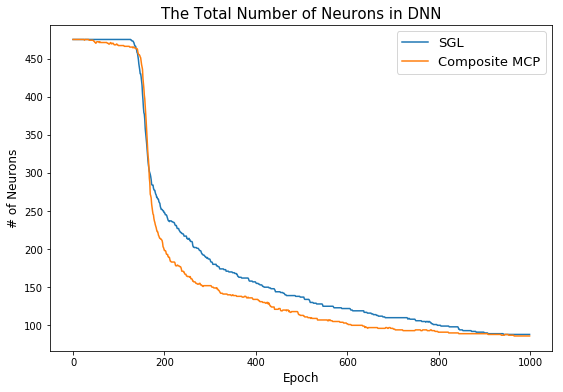

In [49]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(res['neurons']['SGL'],label="SGL")
ax.plot(res["neurons"]["CMCP"],label="Composite MCP")
title=ax.set_title("The Total Number of Neurons in DNN")
title.set_fontsize(fontsize=15)
xlab=plt.xlabel("Epoch")
ylab=plt.ylabel("# of Neurons")

xlab.set_fontsize(fontsize=12)
ylab.set_fontsize(fontsize=12)
plt.legend(prop={"size":13})
plt.show()